In [1]:
%matplotlib inline  
#import croaks
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy

# nt_meas = croaks.NTuple.fromtxt("/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Photometry_final_chi2-0_g-meas.csv") 
# nt_ref  = croaks.NTuple.fromtxt("/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Photometry_final_chi2-0_g-ref.csv")

f_meas = "/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Astrometry_final_chi2-0_g-meas_simple.csv"
f_ref = "/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Astrometry_final_chi2-0_g-ref_simple.csv"

nt_meas = ascii.read(f_meas)
nt_ref = ascii.read(f_ref)

FileNotFoundError: [Errno 2] No such file or directory: '/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Astrometry_final_chi2-0_g-meas_simple.csv'

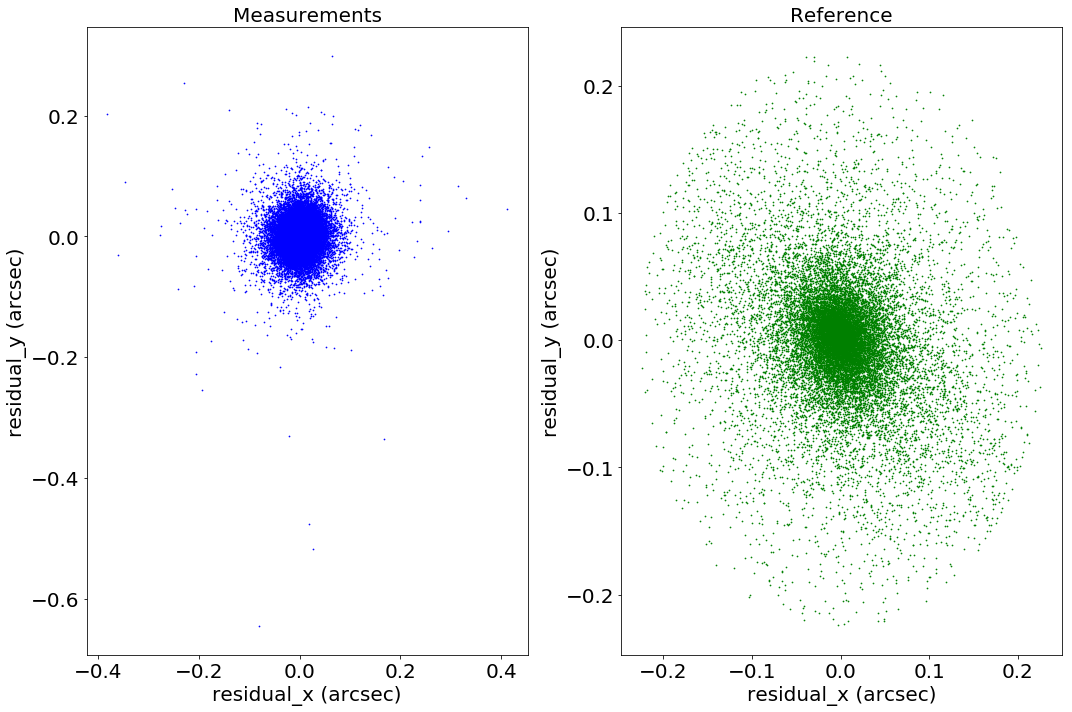

In [13]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
ax0.scatter(3600*nt_meas['rx'],3600*nt_meas['ry'], s=0.5, color='blue')
ax0.set_xlabel("residual_x (arcsec)", fontsize=20)
ax0.set_ylabel("residual_y (arcsec)", fontsize=20)
ax0.tick_params(labelsize=20)
ax0.set_title("Measurements", fontsize=20)
ax1.scatter(3600*nt_ref['rx'],3600*nt_ref['ry'], s=0.5, color='green')
ax1.set_xlabel("residual_x (arcsec)", fontsize=20)
ax1.set_ylabel("residual_y (arcsec)", fontsize=20)
ax1.tick_params(labelsize=20)
ax1.set_title("Reference", fontsize=20)
fig.tight_layout()

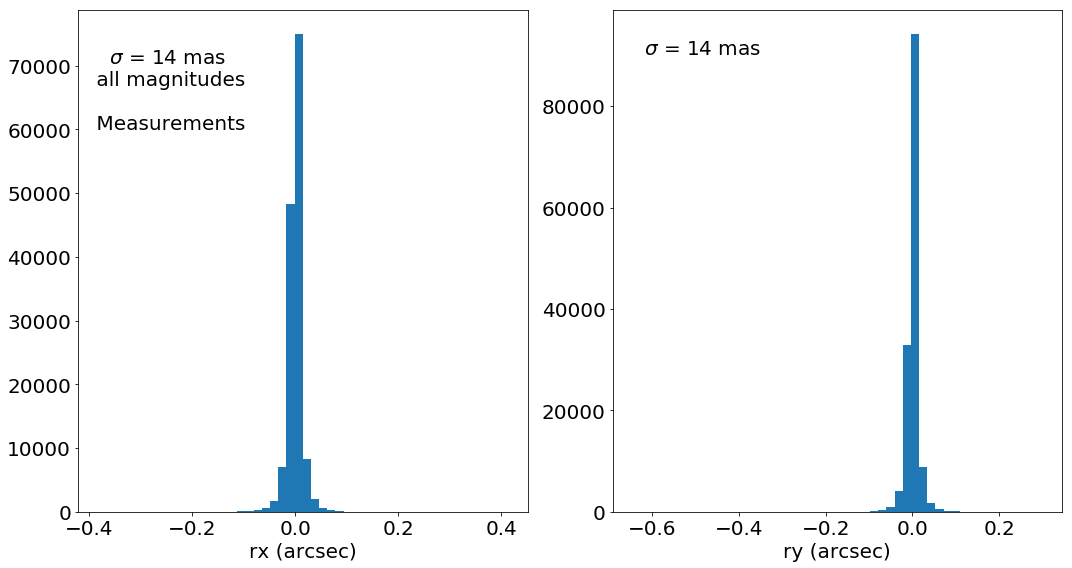

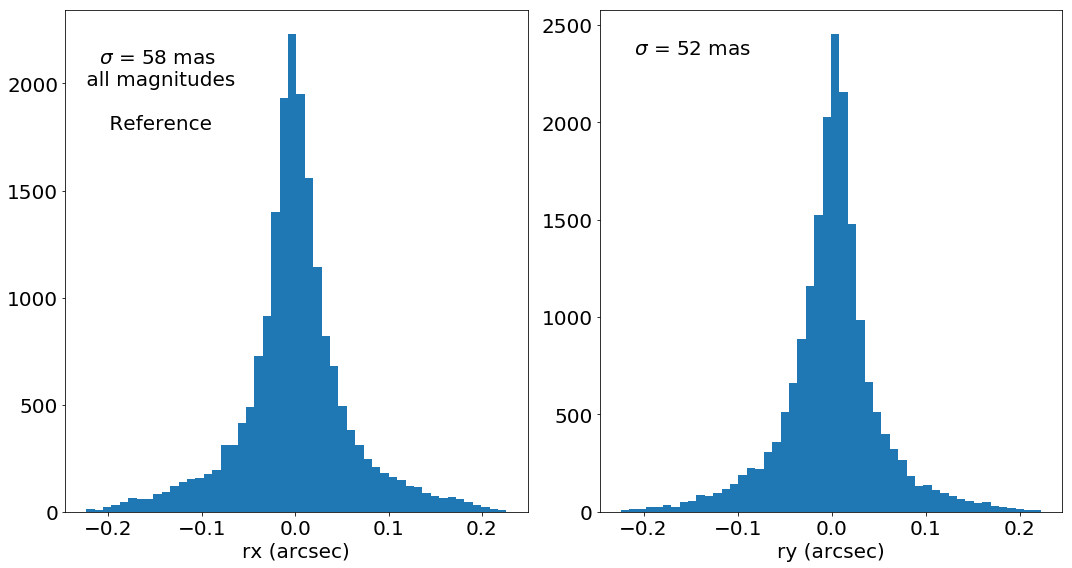

In [14]:
idxs = numpy.where(abs(3600*nt_meas['rx']) < 1)
idys = numpy.where(abs(3600*nt_meas['ry']) < 1)

sigmaX = numpy.std(3600*nt_meas['rx'][idxs])
sigmaY = numpy.std(3600*nt_meas['ry'][idys])

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.hist(3600*nt_meas['rx'][idxs],bins=50)
ax1.hist(3600*nt_meas['ry'][idys],bins=50)
ax0.set_xlabel("rx (arcsec)", fontsize=20)
ax1.set_xlabel("ry (arcsec)", fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

ax0.set_title("$\sigma$ = %.0f mas\n all magnitudes\n\n Measurements"%(sigmaX*1000), x=0.2, y=0.75, fontsize=20)
ax1.set_title("$\sigma$ = %.0f mas"%(sigmaY*1000), x=0.2, y=0.9, fontsize=20)
fig.tight_layout()

jdxs = numpy.where(abs(3600*nt_ref['rx']) < 1)
jdys = numpy.where(abs(3600*nt_ref['ry']) < 1)

sigmaX = numpy.std(3600*nt_ref['rx'][jdxs])
sigmaY = numpy.std(3600*nt_ref['ry'][jdys])

fig, (ax2, ax3) = plt.subplots(ncols=2, figsize=(15, 8))
ax2.hist(3600*nt_ref['rx'][jdxs],bins=50)
ax3.hist(3600*nt_ref['ry'][jdys],bins=50)
ax2.set_xlabel("rx (arcsec)", fontsize=20)
ax3.set_xlabel("ry (arcsec)", fontsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)

ax2.set_title("$\sigma$ = %.0f mas\n all magnitudes\n\n Reference"%(sigmaX*1000), x=0.2, y=0.75, fontsize=20)
ax3.set_title("$\sigma$ = %.0f mas"%(sigmaY*1000), x=0.2, y=0.9, fontsize=20)
fig.tight_layout()

0.00445398107303 0.00458343790876


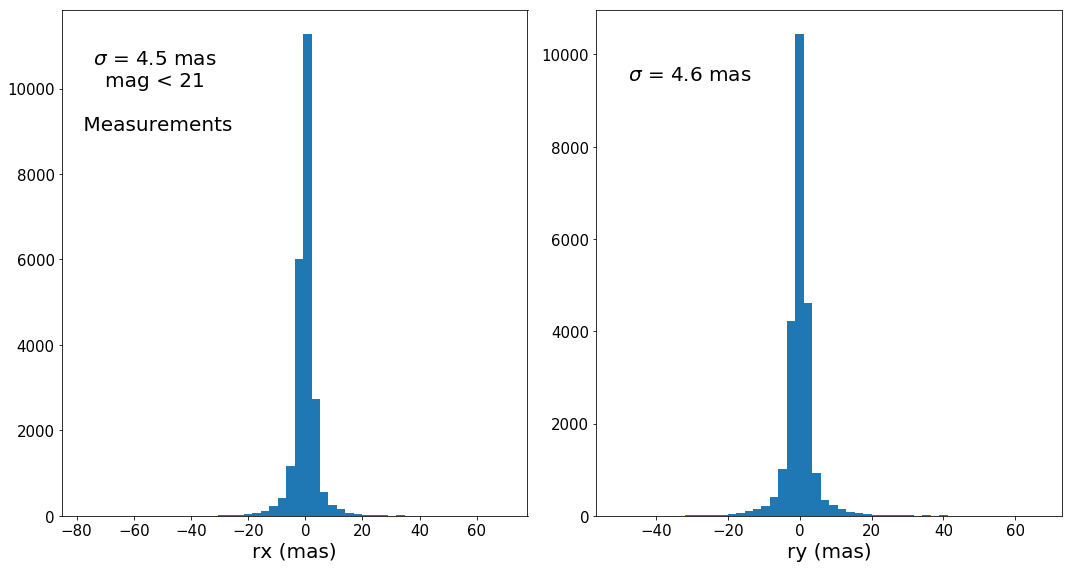

In [16]:
idxs = numpy.where( (abs(3600*nt_meas['rx']) < 0.4) & (nt_meas['mag']<21) )
idys = numpy.where( (abs(3600*nt_meas['ry']) < 0.4)  & (nt_meas['mag']<21) )

sigmaX = numpy.std(3600*nt_meas['rx'][idxs])
sigmaY = numpy.std(3600*nt_meas['ry'][idys])
print(sigmaX, sigmaY)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.hist(3600*nt_meas['rx'][idxs]*1000,bins=50)
ax1.hist(3600*nt_meas['ry'][idys]*1000,bins=50)
ax0.set_xlabel("rx (mas)", fontsize=20)
ax1.set_xlabel("ry (mas)", fontsize=20)
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)

ax0.set_title("$\sigma$ = %.1f mas\nmag < 21\n\n Measurements"%(sigmaX*1000), x=0.2, y=0.75, fontsize=20)
ax1.set_title("$\sigma$ = %.1f mas"%(sigmaY*1000), x=0.2, y=0.85, fontsize=20)
fig.tight_layout()

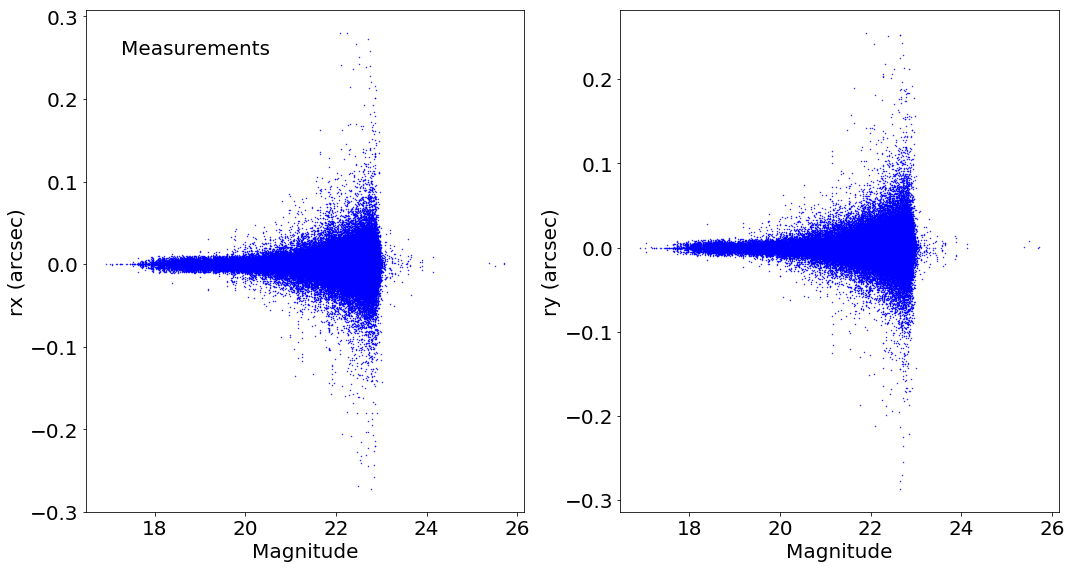

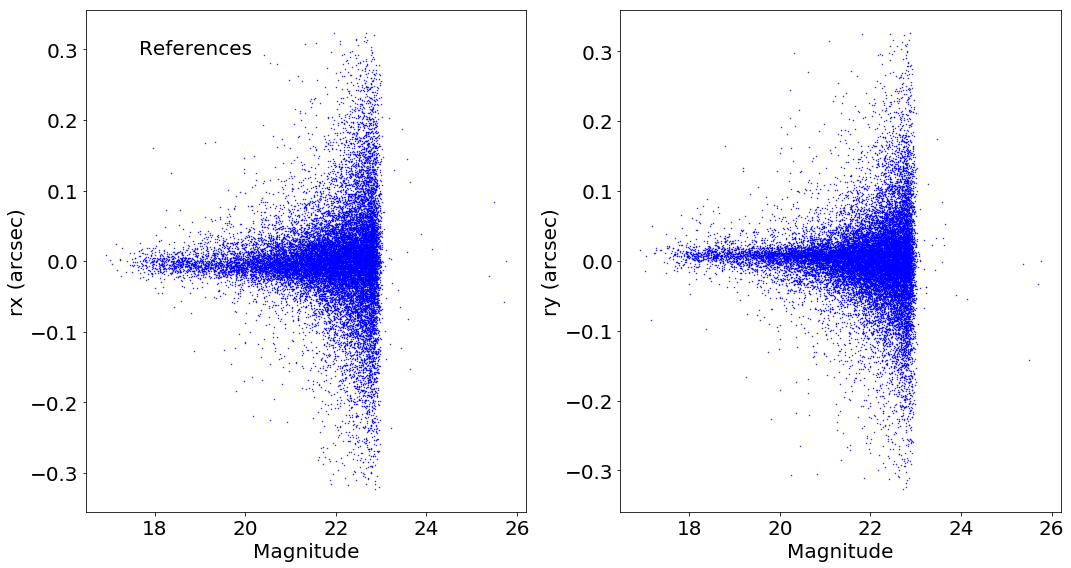

In [10]:
ix = numpy.where( (abs(3600*nt_meas['rx']) < 0.3) & (abs(3600*nt_meas['ry']) < 0.3))
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.scatter(nt_meas['mag'][ix], 3600*nt_meas['rx'][ix], s=0.2, color='blue')
ax1.scatter(nt_meas['mag'][ix], 3600*nt_meas['ry'][ix], s=0.2, color = 'blue')
ax0.set_ylabel("rx (arcsec)", fontsize=20)
ax0.set_xlabel("Magnitude", fontsize=20)
ax1.set_ylabel("ry (arcsec)", fontsize=20)
ax1.set_xlabel("Magnitude", fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)
ax0.set_title("Measurements", fontsize=20, x=0.25, y=0.9)
fig.tight_layout()

ix = numpy.where( (abs(3600*nt_ref['rx']) < 8.) & (abs(3600*nt_ref['ry']) < 8.))
fig, (ax2, ax3) = plt.subplots(ncols=2, figsize=(15, 8))
ax2.scatter(nt_ref['mag'][ix], 3600*nt_ref['rx'][ix], s=0.2, color='blue')
ax3.scatter(nt_ref['mag'][ix], 3600*nt_ref['ry'][ix], s=0.2, color = 'blue')
ax2.set_ylabel("rx (arcsec)", fontsize=20)
ax2.set_xlabel("Magnitude", fontsize=20)
ax3.set_ylabel("ry (arcsec)", fontsize=20)
ax3.set_xlabel("Magnitude", fontsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)
ax2.set_title("References", fontsize=20, x=0.25, y=0.9)
fig.tight_layout()

/home/boutigny/LSST/new/lsstsw/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/boutigny/LSST/new/lsstsw/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/boutigny/LSST/new/lsstsw/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


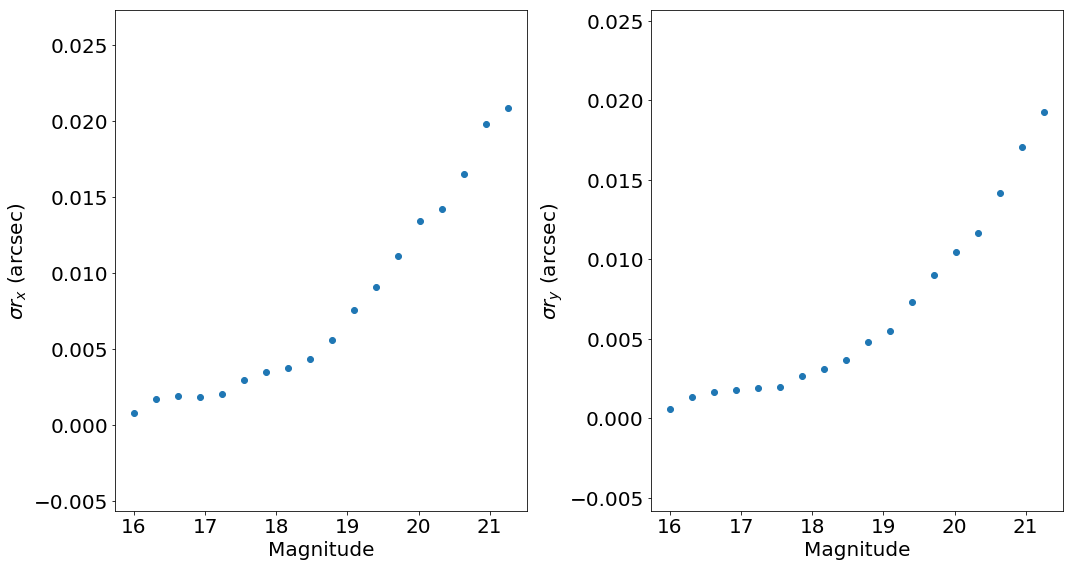

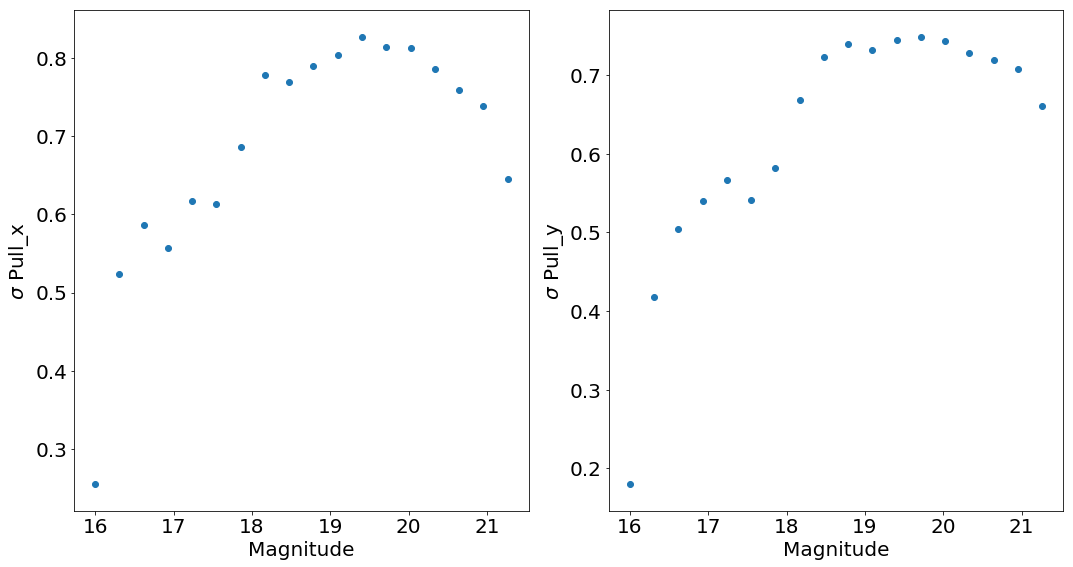

In [6]:
magMin = 16
magMax = 22.5
numStep = 22
magVal, step = numpy.linspace(magMin,magMax,num=numStep,retstep=True)

sigmaRx = []
sigmaRy = []
pullX = []
pullY = []

for m in magVal :
    idm = numpy.where( (nt_meas['mag']>m-step/2) & (nt_meas['mag']<=m+step/2) & 
                      (abs(3600*nt_meas['rx'])<0.3) & (abs(3600*nt_meas['ry'])<0.3) )
    sigmaRx.append(numpy.std(3600*nt_meas['rx'][idm]))
    sigmaRy.append(numpy.std(3600*nt_meas['ry'][idm]))
    pullX.append(numpy.std(nt_meas["rx"][idm]/numpy.sqrt(nt_meas["rvx"][idm])))
    pullY.append(numpy.std(nt_meas["ry"][idm]/numpy.sqrt(nt_meas["rvy"][idm])))
    
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.scatter(magVal,sigmaRx)
ax0.set_xlabel("Magnitude", fontsize=20)
ax0.set_ylabel("$\sigma r_x$ (arcsec)", fontsize=20)
ax1.scatter(magVal,sigmaRy)
ax1.set_xlabel("Magnitude", fontsize=20)
ax1.set_ylabel("$\sigma r_y$ (arcsec)", fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.tight_layout()

fig, (ax2, ax3) = plt.subplots(ncols=2, figsize=(15, 8))
ax2.scatter(magVal,pullX)
ax2.set_xlabel("Magnitude", fontsize=20)
ax2.set_ylabel("$\sigma$ Pull_x", fontsize=20)
ax3.scatter(magVal,pullY)
ax3.set_xlabel("Magnitude", fontsize=20)
ax3.set_ylabel("$\sigma$ Pull_y", fontsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)

fig.tight_layout()

In [7]:
nt_ref

NTuple([ ( 34.7856273, -5.50095596,  -1.61512925e-05,   1.39077354e-05,  18.7291675,   7.71604938e-10,   7.71604938e-10,  -5.27975093e-23, 0,  72100,  0.588759  , 14),
       ( 34.7873072, -5.52715021,  -8.52373580e-06,  -5.72460830e-06,  19.3168264,   7.71604938e-10,   7.71604938e-10,   1.14689983e-23, 0,  72102,  0.13663107,  1),
       ( 34.7891348, -5.57101141,  -1.04336680e-05,   3.69475723e-06,  17.2108348,   7.71604938e-10,   7.71604938e-10,  -9.06092752e-24, 0,  72104,  0.15877641,  1),
       ...,
       ( 34.4192371, -4.20873872,  -1.52393633e-06,  -1.03387159e-05,  20.0848074,   7.71604938e-10,   7.71604938e-10,   3.70325108e-24, 0, 121094,  0.14153801,  1),
       ( 34.2380225, -4.16818421,  -6.07134225e-06,   4.00430226e-06,  19.5613464,   7.71604938e-10,   7.71604938e-10,  -5.71427717e-24, 0, 121096,  0.06855274,  1),
       ( 34.2376228, -4.16939591,  -1.10585159e-05,  -1.12947665e-05,  20.6351743,   7.71604938e-10,   7.71604938e-10,   2.93578223e-23, 0, 121098,  0.32382

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
ax0.scatter(nt_ref['mag'], nt_ref['chi2'], s=0.5, color='blue')
ax1.scatter(nt_meas['mag'], nt_meas['chi2'], s=0.5, color='blue')

In [3]:
from astropy.io import ascii

f = "/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Photometry_final_chi2-0_g-meas.csv"
data = ascii.read(f) 
data

xccd,yccd,mag,instFlux,instFluxError,flux,fluxError,transformedFlux,transformedFluxErr,fflux,mjd,color,fsindex,ra,dec,chi2,nm,chip,visit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64
437.356,138.965,19.3182,406457.0,540.576,1.85554e-08,2.54405e-11,1.95483e-08,2.59986e-11,1.95913e-08,56979.5,0,357,0.215558,-0.719758,2.73985,4,0,11690
1812.63,258.518,21.9954,33075.3,409.468,1.50994e-09,1.86996e-11,1.62081e-09,2.00653e-11,1.68183e-09,56979.5,0,358,0.222008,-0.660368,9.25077,8,0,11690
1200.12,354.39,21.4155,58712.7,424.276,2.68033e-09,1.93895e-11,2.85211e-09,2.06102e-11,2.84847e-09,56979.5,0,359,0.225915,-0.686819,0.0311636,10,0,11690
344.145,629.533,21.944,36611.6,426.579,1.67138e-09,1.9482e-11,1.75227e-09,2.04165e-11,1.73428e-09,56979.5,0,360,0.23765,-0.723263,0.77661,6,0,11690
1061.19,680.019,21.7148,44115.2,421.582,2.01393e-09,1.92576e-11,2.13412e-09,2.03945e-11,2.16062e-09,56979.5,0,361,0.240557,-0.692505,1.6892,8,0,11690
489.488,750.324,21.7453,44067.4,427.54,2.01175e-09,1.95294e-11,2.11221e-09,2.04926e-11,2.09239e-09,56979.5,0,362,0.243236,-0.716943,0.936022,5,0,11690
1044.26,794.844,21.4532,57071.7,426.679,2.60542e-09,1.94979e-11,2.75799e-09,2.06193e-11,2.75248e-09,56979.5,0,363,0.245739,-0.693123,0.0714206,5,0,11690
335.02,842.539,19.4511,362195.0,534.044,1.65348e-08,2.49945e-11,1.7305e-08,2.55156e-11,1.72768e-08,56979.5,0,364,0.247253,-0.723432,1.21932,2,0,11690
1467.52,878.323,19.5919,314064.0,503.664,1.43375e-08,2.34839e-11,1.52594e-08,2.44715e-11,1.53185e-08,56979.5,0,365,0.249875,-0.674783,5.83816,7,0,11690
